# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#API Key
from api_keys import weather_api_key

#Import cities
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#List of latitudes and longitudes
lat_lngs = []

#List of cities
cities = []

#Range of lats and lngs
lat_range = (-90,90)
lng_range = (-180,180)

#Randomly generate latitudes and longitudes
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

#Find the nearest city for each coordinate pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #Add unique cities to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [3]:
#Base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

#City data list
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #Create endpoint URL with each city
    city_url = url + city
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | gulshat
City not found. Skipping...
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | torrevieja
Processing Record 9 of Set 1 | ereymentau
Processing Record 10 of Set 1 | jujuy
City not found. Skipping...
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | zunyi
Processing Record 14 of Set 1 | borovskoy
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | solovetskiy
City not found. Skipping...
Processing Re

Processing Record 37 of Set 4 | kayanga
Processing Record 38 of Set 4 | naples
Processing Record 39 of Set 4 | la roda
Processing Record 40 of Set 4 | takoradi
Processing Record 41 of Set 4 | el colomo
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | blackfoot
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | mar del plata
Processing Record 46 of Set 4 | khani
Processing Record 47 of Set 4 | katsuura
Processing Record 48 of Set 4 | zhangye
Processing Record 49 of Set 4 | road town
Processing Record 0 of Set 5 | billings
Processing Record 1 of Set 5 | muravlenko
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | los algarrobos
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | pangnirtung
Processing Record 6 of Set 5 | parana
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | port-gentil
Processing Record 9 of Set 5 | poros
Processing Record 10 of Set 5 | aden
Processing Rec

Processing Record 27 of Set 8 | marawi
Processing Record 28 of Set 8 | lumut
Processing Record 29 of Set 8 | cobija
Processing Record 30 of Set 8 | talawdi
City not found. Skipping...
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | hirara
Processing Record 33 of Set 8 | suaza
Processing Record 34 of Set 8 | emba
Processing Record 35 of Set 8 | mbeya
Processing Record 36 of Set 8 | hunza
City not found. Skipping...
Processing Record 37 of Set 8 | ciudad bolivar
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | kangaba
Processing Record 40 of Set 8 | petropavlovka
Processing Record 41 of Set 8 | lethem
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | piacabucu
Processing Record 44 of Set 8 | ibra
Processing Record 45 of Set 8 | manutuke
Processing Record 46 of Set 8 | sorland
Processing Record 47 of Set 8 | maniitsoq
Processing Record 48 of Set 8 | fukue
Processing Record 49 of Set 8 | rovaniemi
Processing Record

Processing Record 18 of Set 12 | sitges
Processing Record 19 of Set 12 | halalo
City not found. Skipping...
Processing Record 20 of Set 12 | freeport
Processing Record 21 of Set 12 | turukhansk
Processing Record 22 of Set 12 | ji-parana
City not found. Skipping...
Processing Record 23 of Set 12 | roma
Processing Record 24 of Set 12 | port augusta
Processing Record 25 of Set 12 | pandan
Processing Record 26 of Set 12 | komsomolskiy
Processing Record 27 of Set 12 | kropotkin
Processing Record 28 of Set 12 | kochevo
Processing Record 29 of Set 12 | jiangyou
Processing Record 30 of Set 12 | baculin
Processing Record 31 of Set 12 | stodolishche
Processing Record 32 of Set 12 | opuwo
Processing Record 33 of Set 12 | nizhneshilovka
City not found. Skipping...
Processing Record 34 of Set 12 | sarangani
Processing Record 35 of Set 12 | rio grande
Processing Record 36 of Set 12 | tukrah
Processing Record 37 of Set 12 | kaihua
Processing Record 38 of Set 12 | kieta
Processing Record 39 of Set 12 

In [4]:
#Convert into DataFrame
city_data_df = pd.DataFrame(city_data)

#Show record count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,91,76,0.31,EC,1681107387
1,punta arenas,-53.1500,-70.9167,4.06,75,40,3.60,CL,1681107387
2,vaini,-21.2000,-175.2000,27.09,89,20,3.60,TO,1681107387
3,hilo,19.7297,-155.0900,22.85,82,0,1.79,US,1681107387
4,vao,-22.6667,167.4833,25.90,75,5,1.60,NC,1681107387


In [6]:
#Export city data to csv
city_data_df = city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
#Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Display preview
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,91,76,0.31,EC,1681107387
1,punta arenas,-53.1500,-70.9167,4.06,75,40,3.60,CL,1681107387
2,vaini,-21.2000,-175.2000,27.09,89,20,3.60,TO,1681107387
3,hilo,19.7297,-155.0900,22.85,82,0,1.79,US,1681107387
4,vao,-22.6667,167.4833,25.90,75,5,1.60,NC,1681107387


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

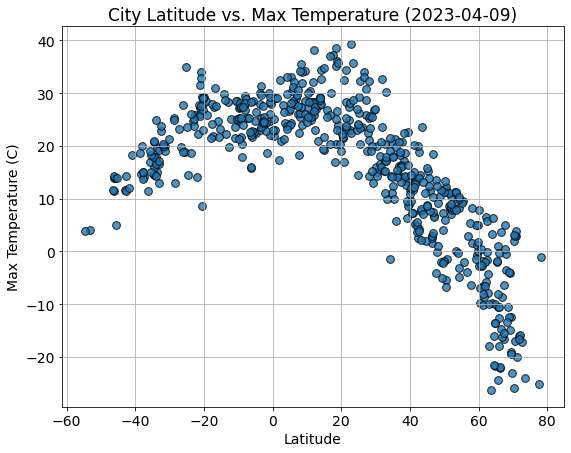

In [8]:
#Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=0.8,s=60)

#Date conversion
time_structure = time.localtime(city_data_df.iloc[0,8])
date = time.strftime("%Y-%m-%d", time_structure)
date

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Temperature (C)",size=14)
plt.title(f"City Latitude vs. Max Temperature ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

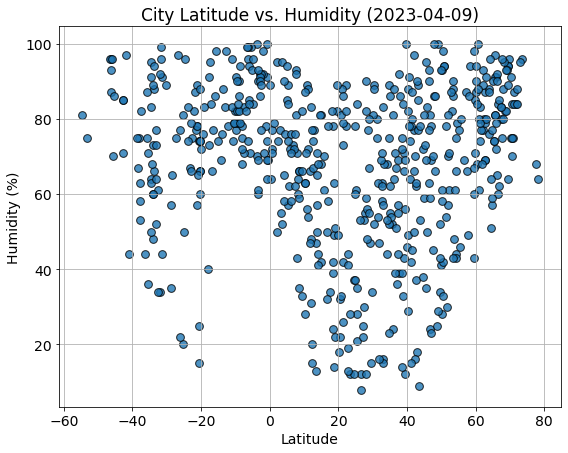

In [9]:
#Build scatter plot for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.title(f"City Latitude vs. Humidity ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

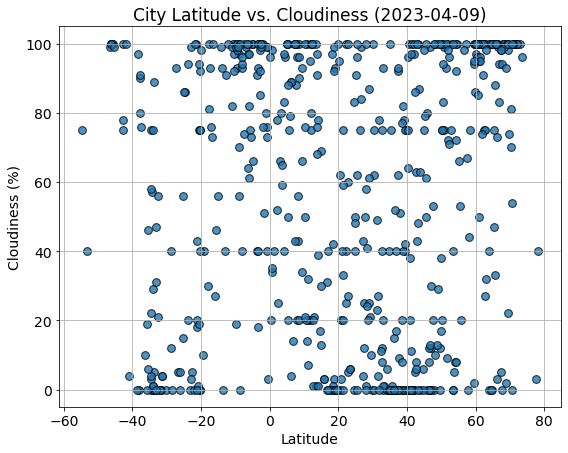

In [10]:
#Build scatter plot for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.title(f"City Latitude vs. Cloudiness ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed

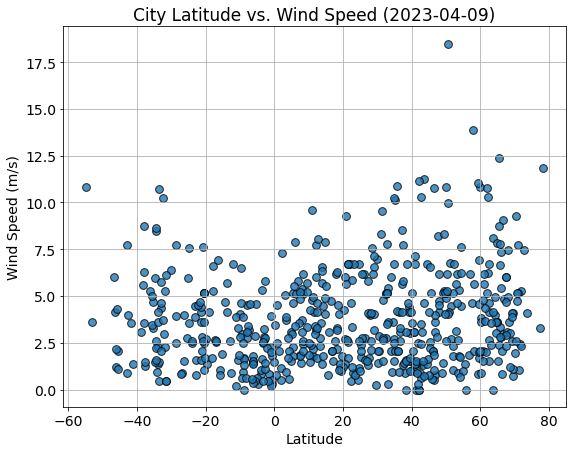

In [11]:
#Build scatter plot for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.figure(figsize=(9,7))
plt.scatter(x,y,edgecolor="black",alpha=.8,s=60)

#Incorporate the other graph properties
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (m/s)",size=14)
plt.title(f"City Latitude vs. Wind Speed ({date})",size=17)
plt.grid()

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
#Define a function to create Linear Regression plots
def lr(a,b,c,d,e,f):
    
    #Build scatter plot for chosen a,b
    plt.figure(figsize=(9,7))
    plt.scatter(a,b,s=60)

    #Incorporate the other graph properties
    plt.tick_params(axis='both',which='major',labelsize=14)
    plt.xlabel(c,size=14)
    plt.ylabel(d,size=14)
    
    #Regression
    (slope, intercept, r, p, stderr) = linregress(a,b)
    line = slope*a + intercept
    plt.plot(a,line,"r-")
    plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(e,f),color="red",size=22)
    print(f"The r-value is {r}")
    
    #Show plot
    plt.show()

In [13]:
#Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

#Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hilo,19.7297,-155.0900,22.85,82,0,1.79,US,1681107387
6,torrevieja,37.9787,-0.6822,14.18,86,51,0.89,ES,1681107122
7,ereymentau,51.6199,73.1033,8.18,30,9,4.47,KZ,1681107388
8,bethel,41.3712,-73.4140,5.17,80,0,0.00,US,1681107389
10,zunyi,27.6867,106.9072,22.40,55,50,1.70,CN,1681107389


In [14]:
#Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

#Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,91,76,0.31,EC,1681107387
1,punta arenas,-53.1500,-70.9167,4.06,75,40,3.60,CL,1681107387
2,vaini,-21.2000,-175.2000,27.09,89,20,3.60,TO,1681107387
4,vao,-22.6667,167.4833,25.90,75,5,1.60,NC,1681107387
5,hobart,-42.8794,147.3294,11.70,85,75,7.72,AU,1681107388


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8819547654054926


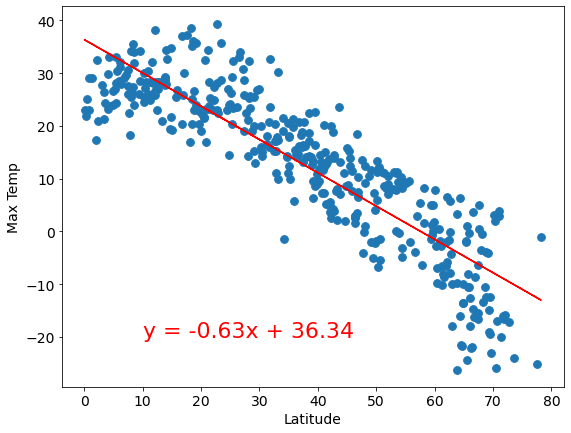

In [15]:
#Linear regression on Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = 10
f = -20
lr(a,b,c,d,e,f)

The r-value is 0.6853979939545827


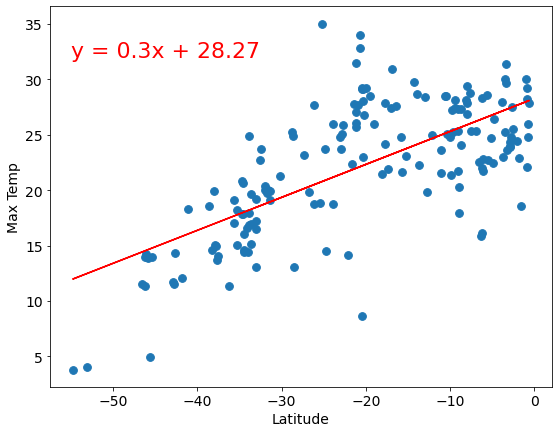

In [16]:
#Linear regression on Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Max Temp"]
c = "Latitude"
d = "Max Temp"
e = -55
f = 32
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.27758498145787486


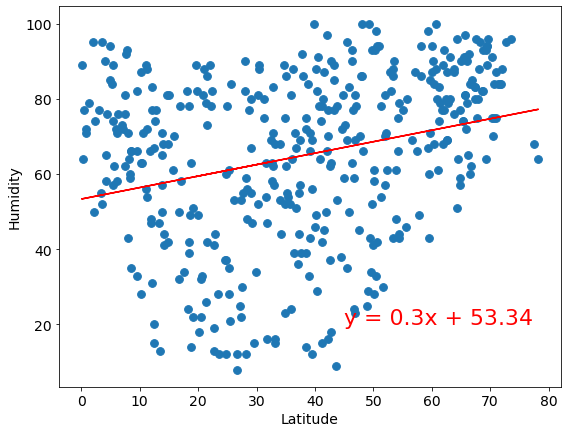

In [17]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = 45
f = 20
lr(a,b,c,d,e,f)

The r-value is 0.22905388500457827


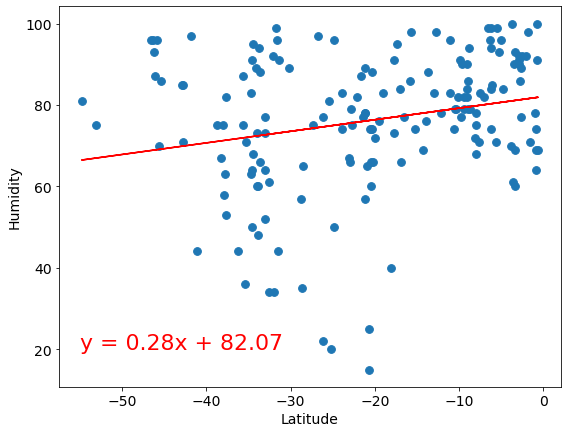

In [18]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Humidity"]
c = "Latitude"
d = "Humidity"
e = -55
f = 20
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.18236567796939632


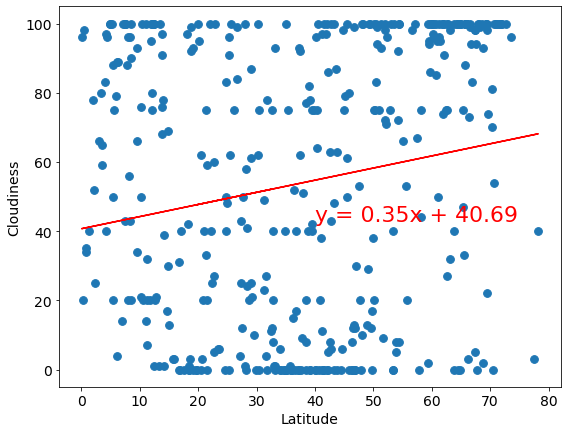

In [19]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = 40
f = 43
lr(a,b,c,d,e,f)

The r-value is 0.32870549056312753


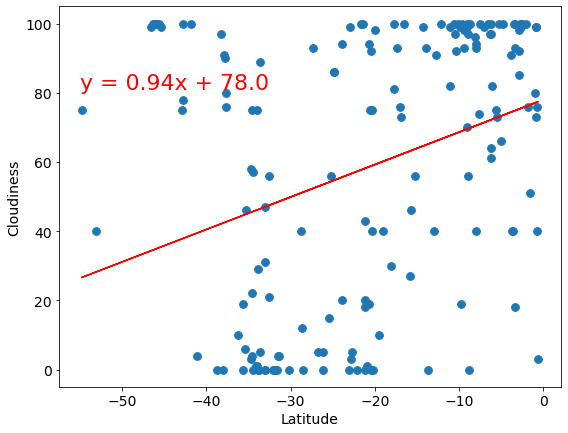

In [20]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Cloudiness"]
c = "Latitude"
d = "Cloudiness"
e = -55
f = 81
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13239631013356418


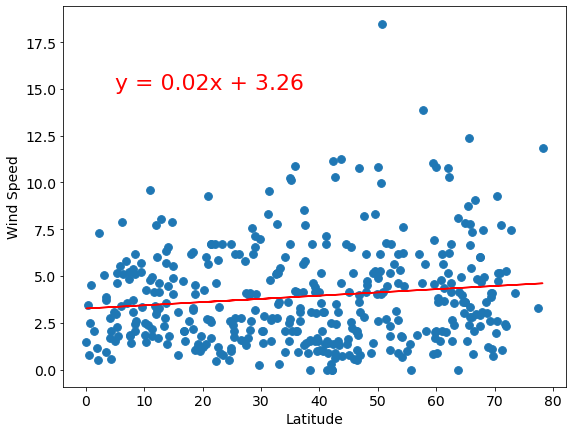

In [21]:
#Northern Hemisphere
a = northern_hemi_df["Lat"]
b = northern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = 5
f = 15
lr(a,b,c,d,e,f,)

The r-value is -0.339618597529521


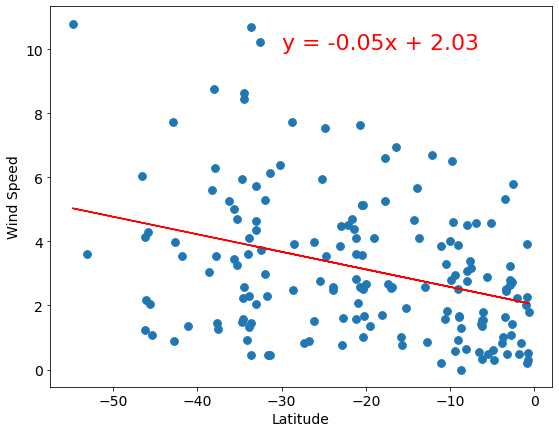

In [22]:
#Southern Hemisphere
a = southern_hemi_df["Lat"]
b = southern_hemi_df["Wind Speed"]
c = "Latitude"
d = "Wind Speed"
e = -30
f = 10
lr(a,b,c,d,e,f)

**Discussion about the linear relationship:** YOUR RESPONSE HERE